In [85]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd


In [86]:
Batch_size=32
Image_size=256
channels=3
epochs=50

In [87]:
tf_data=keras.utils.image_dataset_from_directory(
   directory="plants",
   batch_size=Batch_size,
   image_size=(Image_size,Image_size)
)

Found 2152 files belonging to 3 classes.


In [88]:
classes=tf_data.class_names

In [89]:
classes

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [90]:
for image,label in tf_data.take(3):
    print(image.shape)
    print(label.numpy())

(32, 256, 256, 3)
[0 1 0 0 1 1 0 1 1 2 1 0 0 0 0 2 2 0 1 1 1 0 0 1 0 1 2 0 1 1 2 0]
(32, 256, 256, 3)
[0 0 0 1 1 1 2 0 1 1 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 0 0 1 1 1 1 0]
(32, 256, 256, 3)
[1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 2 2 0 1 0 1]


In [91]:
def partition(tf_data,train_split=0.8,test_split=0.1,val_split=0.8,shuffle=True):
    train_size = int(len(tf_data) * train_split)
    test_size = int(len(tf_data) * test_split)
    val_size = int(len(tf_data) * val_split)
    train_data=tf_data.take((train_size))
    test_data=tf_data.skip(train_size).take(test_size)
    val_data=tf_data.skip(train_size).skip(test_size)
    return train_data,test_data,val_data

In [92]:
train_ds,test_ds,val_ds=partition(tf_data)

In [95]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    rescale=1./255
)
train_ds=train_datagen.flow_from_directory(
    "plants",
    target_size=(Image_size,Image_size),
    batch_size=32
)

Found 2152 images belonging to 3 classes.


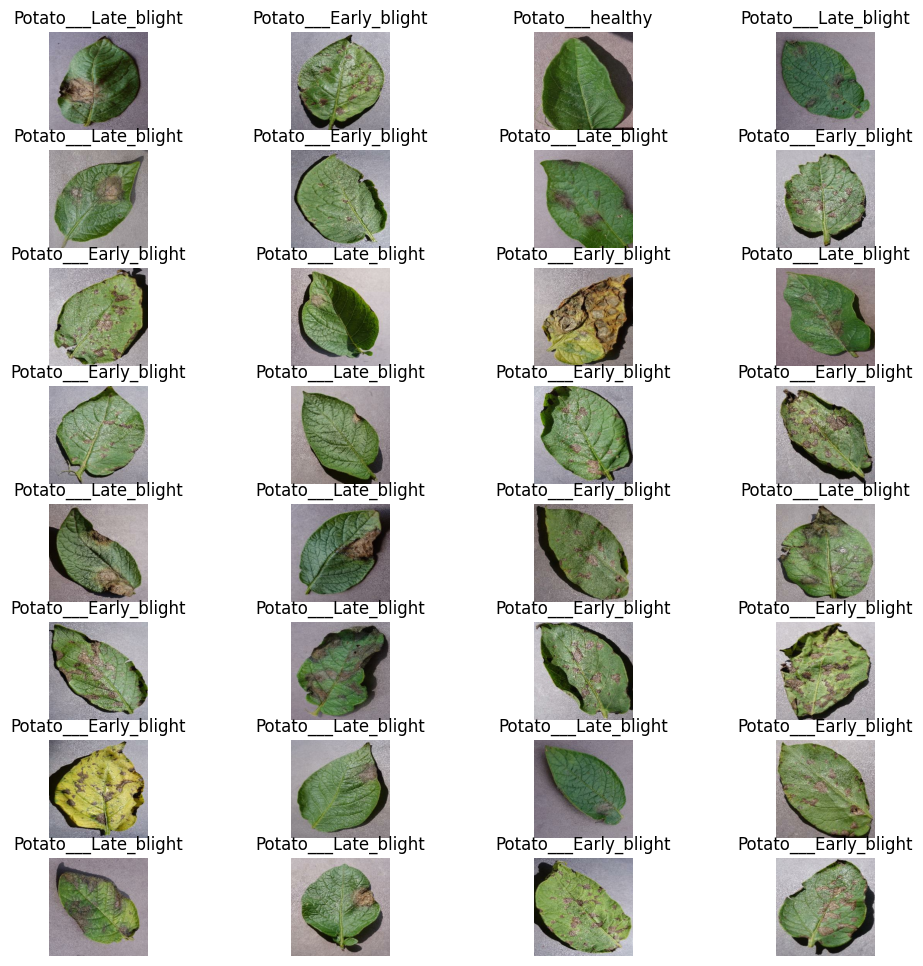

In [96]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
for image,label in tf_data.take(1):
    for i in range(32):
        plt.subplot(8,4,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(classes[label[i]])
        plt.axis('off')
        


In [97]:
def partition(tf_data,train_split=0.8,test_split=0.1,val_split=0.8,shuffle=True):
    train_size = int(len(tf_data) * train_split)
    test_size = int(len(tf_data) * test_split)
    val_size = int(len(tf_data) * val_split)
    train_data=tf_data.take((train_size))
    test_data=tf_data.skip(train_size).take(test_size)
    val_data=tf_data.skip(train_size).skip(test_size)
    return train_data,test_data,val_data

In [98]:
train_ds,test_ds,val_ds=partition(tf_data)

In [99]:
len(train_ds)

54

In [100]:
len(test_ds)

6

In [101]:
len(val_ds)

8

In [102]:

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

NameError: name 'layers' is not defined

In [103]:
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Input
from keras import Sequential

In [104]:
input_shape=(Image_size,Image_size,channels)
n_classes=3
model=Sequential([
    Input(shape=input_shape),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64,activation='relu'),
    Dense(n_classes, activation='softmax')
    
])

In [105]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [106]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 60, 60, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 12, 12, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 4, 4, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,955 (429.51 KB)

 Trainable params: 109,955 (429.51 KB)

 Non-trainable params: 0 (0.00 B)

In [107]:
history=model.fit(
    train_ds,
    batch_size=32,
    validation_data=val_ds,
    epochs=3
)

Epoch 1/3
54/54 ━━━━━━━━━━━━━━━━━━━━ 59s 937ms/step - accuracy: 0.4370 - loss: 2.2747 - val_accuracy: 0.6940 - val_loss: 0.8043
Epoch 2/3
54/54 ━━━━━━━━━━━━━━━━━━━━ 47s 870ms/step - accuracy: 0.6633 - loss: 0.7322 - val_accuracy: 0.7069 - val_loss: 0.5860
Epoch 3/3
54/54 ━━━━━━━━━━━━━━━━━━━━ 46s 847ms/step - accuracy: 0.7901 - loss: 0.4984 - val_accuracy: 0.8664 - val_loss: 0.3729


In [108]:

model.save('model2.h5')

In [109]:


history

In [110]:
history.params

{'verbose': 'auto', 'epochs': 3, 'steps': 54}

In [111]:

history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [112]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

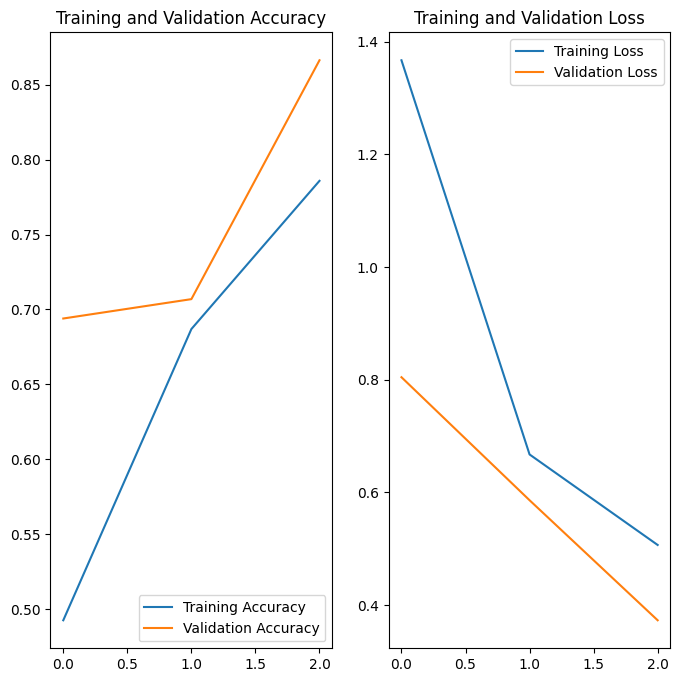

In [113]:
EPOCHS=3
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
predicted label: Potato___Early_blight
first image to predict
actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
predicted label: Potato___Early_blight
first image to predict
actual label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
predicted label: Potato___Late_blight
first image to predict
actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
predicted label: Potato___Early_blight
first image to predict
actual label: Potato___healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
predicted label: Potato___Late_blight
first image to predict
actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
predicted label: Potato___Early_blight


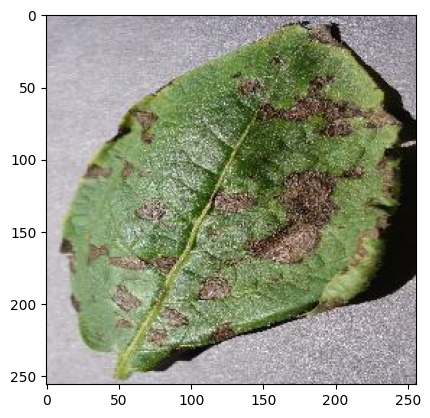

In [115]:
import numpy as np
for images_batch, labels_batch in test_ds.take(9):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",classes[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",classes[np.argmax(batch_prediction[0])])

In [122]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = classes[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


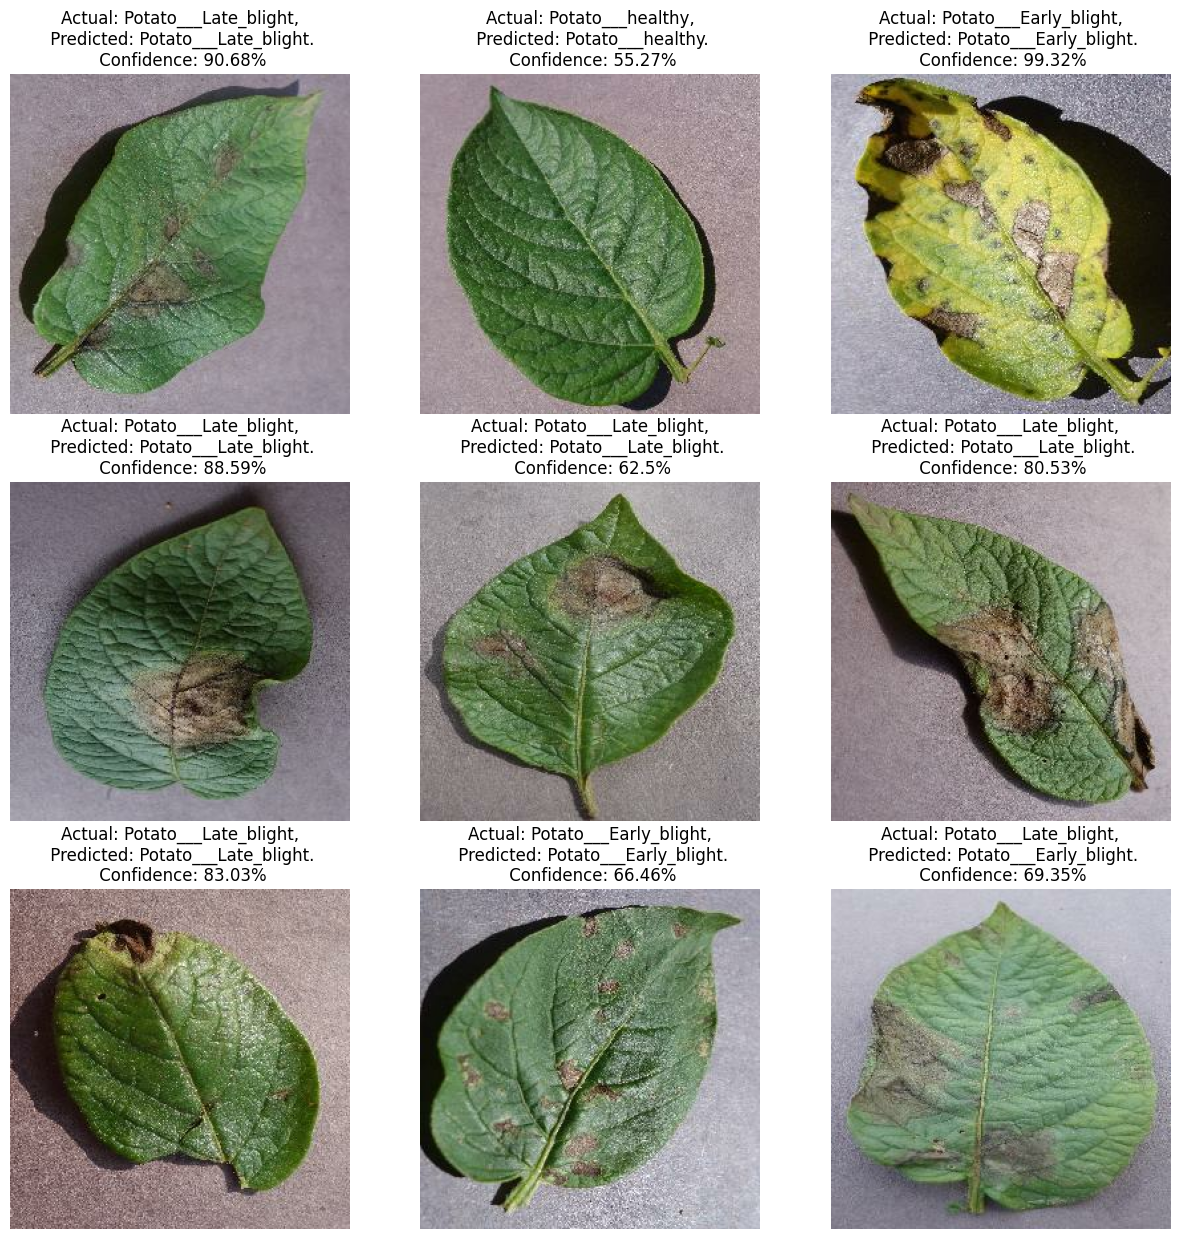

In [123]:

plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = classes[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

plants\Potato___Early_blight\0a8a68ee-f587-4dea-beec-79d02e7d3fa4___RS_Early.B 8461.JPG

In [ ]:
len(test_ds)

68

first image to predict
actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step
predicted label: Potato___Early_blight
first image to predict
actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step
predicted label: Potato___Early_blight
first image to predict
actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
predicted label: Potato___Early_blight
first image to predict
actual label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
predicted label: Potato___Late_blight
first image to predict
actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step
predicted label: Potato___Early_blight
first image to predict
actual label: Potato___healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
predicted label: Potato___Late_blight


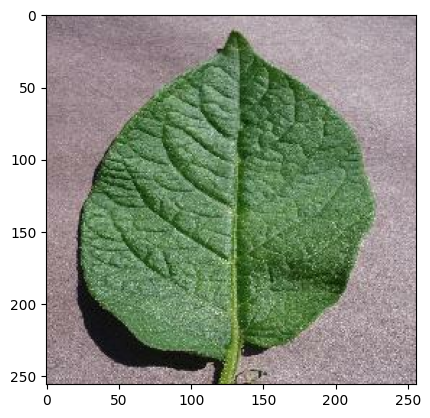

In [124]:

import numpy as np
for images_batch, labels_batch in test_ds.take(15):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",classes[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",classes[np.argmax(batch_prediction[0])])